## Dipole close to a Photonic Crystal Slab

### Study of directional emission

In [1]:
import meep as mp 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 290e-9                                             # 290 nm as  lattice constant
r = 103e-9 / a                                         # radius
t = 200e-9 / a                                         # thickness of the slab

c = 3e8

f = 320e12 * a / c                                     # 320 THz, since a = 1  microm, and c = 3e8: f=freq*a/c

In [3]:
print('Frequency of D2 transition in MEEP units: ',f)

Frequency of D2 transition in MEEP units:  0.37699999999999995


In [4]:
resolution = 8                                               # 8 pixels per unit a.

length = 15
lengthz = 5

N = 7                                                         # 7 unit cells in each direction

cell = mp.Vector3(length, length, lengthz)                    # 3D case

dpml = 1                                                      # PML layer thickness

pml_layers = [mp.PML(dpml)]

      
geometry = [mp.Block(center=mp.Vector3(0,0,0), 
            size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
            material=mp.Medium(index = 2))]                   # Block of SiN extending up to PML region 

for i in range(-N+1,N):
    for j in range(-N+1,N):
            geometry.append(mp.Cylinder(radius=r,
                            height = t,
                            material=mp.Medium(epsilon=1),
                            center = mp.Vector3(i,j,0)))      # We add the air cylinders in into the block


                 
src = [mp.Source(src=mp.ContinuousSource(f),
                     center=mp.Vector3(x=0, y=0, z=0),
                     component=mp.Ey, 
                     amplitude=1.0),                          # We consider a monochromatic source in the center
      ]


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution,
                    force_complex_fields = True)

In [5]:
sim.run(mp.to_appended("ex", mp.at_every(0.5, mp.output_efield_x)), until=31)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000418901 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

In [6]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution,
                    force_complex_fields = True)

sim.run(mp.to_appended("ey", mp.at_every(0.5, mp.output_efield_y)), until=31)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000360966 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

In [7]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution,
                    force_complex_fields = True)

sim.run(mp.to_appended("ez", mp.at_every(0.5, mp.output_efield_z)), until=31)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000295162 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

In [8]:
import h5py

f = h5py.File('ex.h5', 'r')
efield_x = np.array(f['ex.r'])
efield_x_i = np.array(f['ex.i'])
f.close()

In [9]:
f1 = h5py.File('ey.h5', 'r')
efield_y = np.array(f1['ey.r'])
efield_y_i = np.array(f1['ey.i'])
f1.close()

In [10]:
f2 = h5py.File('ez.h5', 'r')
efield_z = np.array(f2['ez.r'])
efield_z_i = np.array(f2['ez.i'])
f2.close()

In [11]:
e_x_xy = efield_x [:,:,20,-1]
e_y_xy = efield_y [:,:,20,-1]
e_z_xy = efield_z [:,:,20,-1]
e_x_xy_i = efield_x_i [:,:,20,-1]
e_y_xy_i = efield_y_i [:,:,20,-1]
e_z_xy_i = efield_z_i [:,:,20,-1]

Text(0, 0.5, '$y(\\mu m)$')

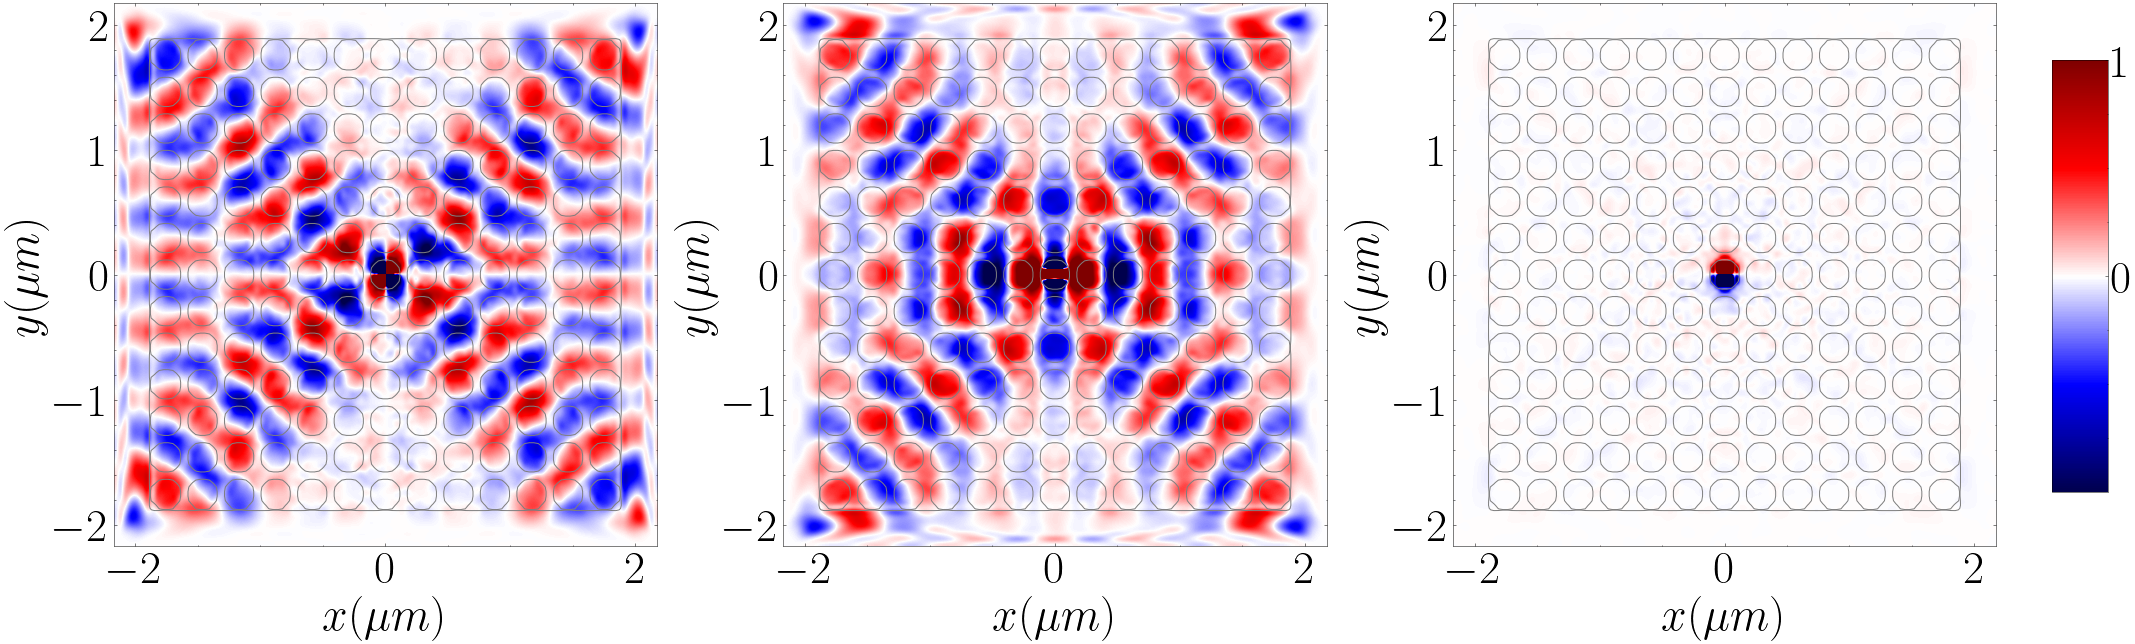

In [12]:
import matplotlib
plt.style.use("science")
matplotlib.rcParams.update({"font.size": 46})

extent = [-0.5*length*a*10**6,0.5*length*a*10**6, -0.5*length*a*10**6, 0.5*length*a*10**6]
fig,ax = plt.subplots(1,3,figsize=(34,10))
im = ax[0].imshow(e_x_xy.T, extent=extent, vmin=-0.2,vmax=0.2, interpolation='spline36', cmap="seismic", alpha=1)
im = ax[1].imshow(e_y_xy.T, extent=extent, vmin=-0.2,vmax=0.2, interpolation='spline36', cmap="seismic", alpha=1)
im = ax[2].imshow(e_z_xy.T, extent=extent, vmin=-0.2,vmax=0.2, interpolation='spline36', cmap="seismic", alpha=1)

eps = sim.get_epsilon()

diel = ax[1].contour(eps[:,:, 20].T, extent=extent,levels=0, cmap='binary', alpha =1)
diel = ax[0].contour(eps[:,:, 20].T, extent=extent, levels=0, cmap='binary', alpha =1)
diel = ax[2].contour(eps[:,:, 20].T, extent=extent, levels=0, cmap='binary', alpha =1)

ticks = [0, 0.2]
cbax = fig.add_axes([0.92,0.2,0.0225,0.6])
cbar = fig.colorbar(im, cax=cbax, ticks=ticks, orientation='vertical',fraction=0.026)
cbar.ax.set_yticklabels([0, 1])  # horizontal colorbar

ax[0].set_xlabel("$x(\\mu m)$")
ax[0].set_ylabel("$y(\\mu m)$")
ax[1].set_xlabel("$x(\\mu m)$")
ax[1].set_ylabel("$y(\\mu m)$")
ax[2].set_xlabel("$x(\\mu m)$")
ax[2].set_ylabel("$y(\\mu m)$")

Text(0, 0.5, '$y(\\mu m)$')

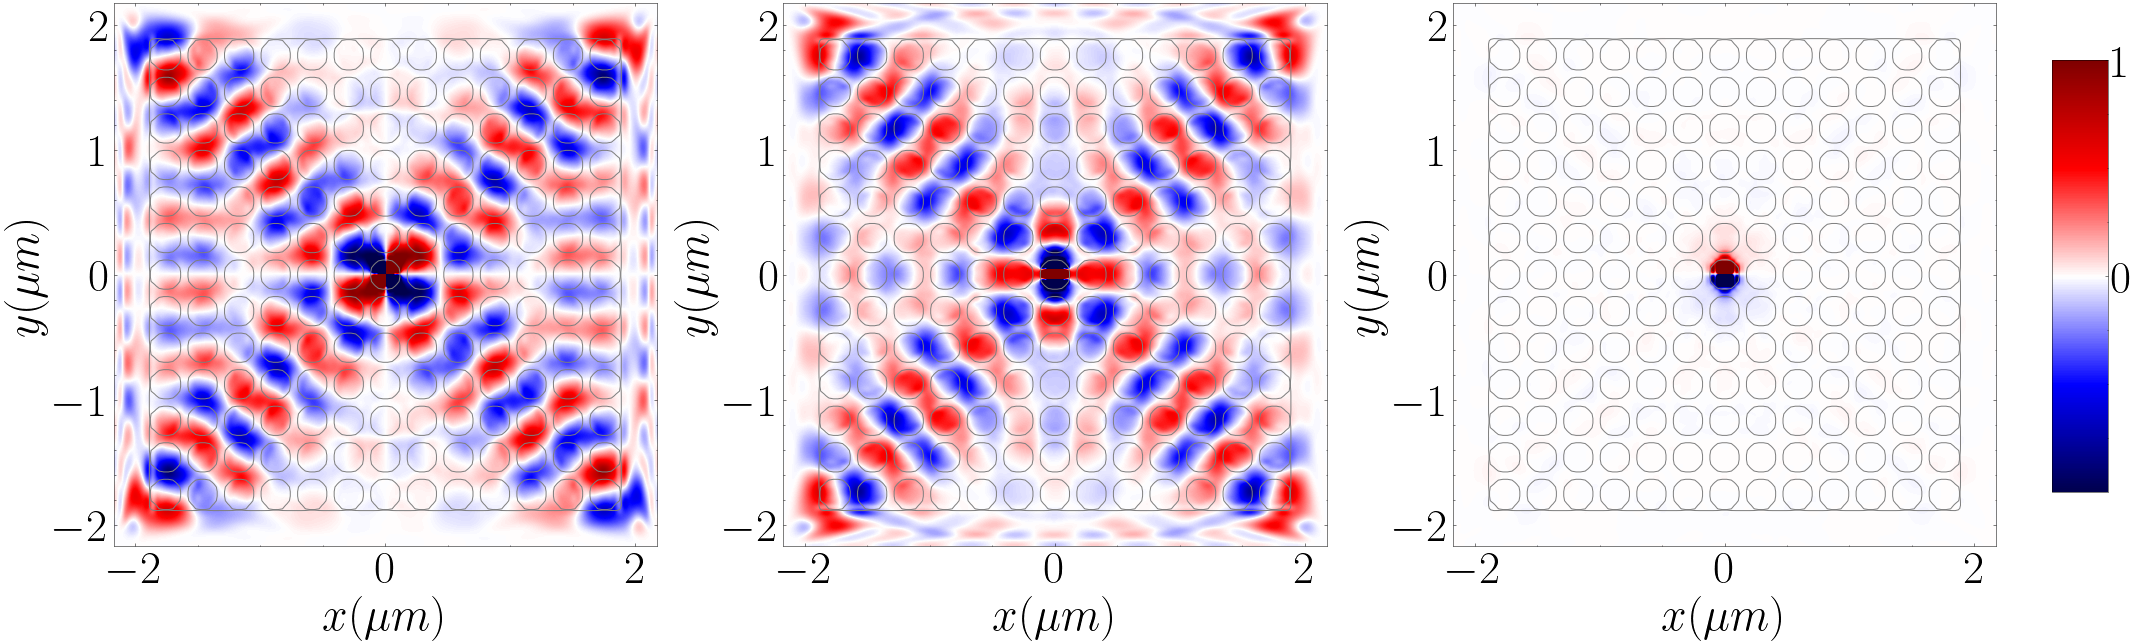

In [13]:
import matplotlib
plt.style.use("science")
matplotlib.rcParams.update({"font.size": 46})

extent = [-0.5*length*a*10**6,0.5*length*a*10**6, -0.5*length*a*10**6, 0.5*length*a*10**6]
fig,ax = plt.subplots(1,3,figsize=(34,10))
im = ax[0].imshow(e_x_xy_i.T, extent=extent, vmin=-0.2,vmax=0.2, interpolation='spline36', cmap="seismic", alpha=1)
im = ax[1].imshow(e_y_xy_i.T, extent=extent, vmin=-0.2,vmax=0.2, interpolation='spline36', cmap="seismic", alpha=1)
im = ax[2].imshow(e_z_xy_i.T, extent=extent, vmin=-0.2,vmax=0.2, interpolation='spline36', cmap="seismic", alpha=1)

eps = sim.get_epsilon()

diel = ax[1].contour(eps[:,:, 20].T, extent=extent,levels=0, cmap='binary', alpha =1)
diel = ax[0].contour(eps[:,:, 20].T, extent=extent, levels=0, cmap='binary', alpha =1)
diel = ax[2].contour(eps[:,:, 20].T, extent=extent, levels=0, cmap='binary', alpha =1)

ticks = [0, 0.2]
cbax = fig.add_axes([0.92,0.2,0.0225,0.6])
cbar = fig.colorbar(im, cax=cbax, ticks=ticks, orientation='vertical',fraction=0.026)
cbar.ax.set_yticklabels([0, 1])  # horizontal colorbar

ax[0].set_xlabel("$x(\\mu m)$")
ax[0].set_ylabel("$y(\\mu m)$")
ax[1].set_xlabel("$x(\\mu m)$")
ax[1].set_ylabel("$y(\\mu m)$")
ax[2].set_xlabel("$x(\\mu m)$")
ax[2].set_ylabel("$y(\\mu m)$")

In [12]:
intensity_0 = np.sqrt(e_x_xy**2+e_y_xy**2+e_z_xy**2)

In [13]:
a = 290e-9                                             # 290 nm as  lattice constant
r = 103e-9 / a                                         # radius
t = 200e-9 / a                                         # thickness of the slab

c = 3e8

f = 390e12 * a / c                                     # 390 THz, since a = 1  microm, and c = 3e8: f=freq*a/c

In [14]:
resolution = 8                                               # 8 pixels per unit a.

length = 15
lengthz = 5

N = 7                                                         # 7 unit cells in each direction

cell = mp.Vector3(length, length, lengthz)                    # 3D case

dpml = 1                                                      # PML layer thickness

pml_layers = [mp.PML(dpml)]

      
geometry = [mp.Block(center=mp.Vector3(0,0,0), 
            size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
            material=mp.Medium(index = 2))]                   # Block of SiN extending up to PML region 

for i in range(-N+1,N):
    for j in range(-N+1,N):
            geometry.append(mp.Cylinder(radius=r,
                            height = t,
                            material=mp.Medium(epsilon=1),
                            center = mp.Vector3(i,j,0)))      # We add the air cylinders in into the block


                 
src = [mp.Source(src=mp.ContinuousSource(f),
                     center=mp.Vector3(x=0, y=0, z=0),
                     component=mp.Ey, 
                     amplitude=1.0),                          # We consider a monochromatic source in the center
      ]


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

In [15]:
a = 290e-9                                             # 290 nm as  lattice constant
r = 103e-9 / a                                         # radius
t = 200e-9 / a                                         # thickness of the slab

c = 3e8

f = 390e12 * a / c                                     # 390 THz, since a = 1  microm, and c = 3e8: f=freq*a/c

In [16]:
print('Frequency of D2 transition in MEEP units: ',f)

Frequency of D2 transition in MEEP units:  0.37699999999999995


In [17]:
resolution = 8                                               # 8 pixels per unit a.

length = 15
lengthz = 5

N = 7                                                         # 7 unit cells in each direction

cell = mp.Vector3(length, length, lengthz)                    # 3D case

dpml = 1                                                      # PML layer thickness

pml_layers = [mp.PML(dpml)]

      
geometry = [mp.Block(center=mp.Vector3(0,0,0), 
            size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
            material=mp.Medium(index = 2))]                   # Block of SiN extending up to PML region 

for i in range(-N+1,N):
    for j in range(-N+1,N):
            geometry.append(mp.Cylinder(radius=r,
                            height = t,
                            material=mp.Medium(epsilon=1),
                            center = mp.Vector3(i,j,0)))      # We add the air cylinders in into the block


                 
src = [mp.Source(src=mp.ContinuousSource(f),
                     center=mp.Vector3(x=0, y=0, z=0),
                     component=mp.Ey, 
                     amplitude=1.0),                          # We consider a monochromatic source in the center
      ]


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000422001 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

<AxesSubplot:xlabel='X', ylabel='Z'>

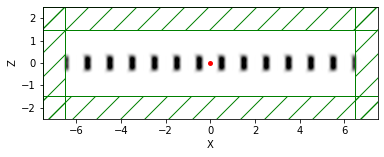

In [18]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0),size=mp.Vector3(15,0,5)))

<AxesSubplot:xlabel='X', ylabel='Y'>

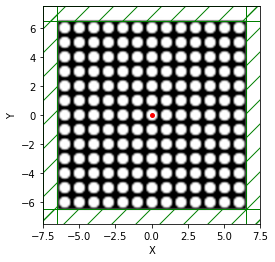

In [19]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0),size=mp.Vector3(15,15,0)))

We have placed our atom in the center of the central hole in the Photonic Crystal Slab!

In [20]:
period = 1/390e12
print('Time units in MEEP', a/c* 10**15,'fs')
print('Period for atom frequency: ', period * 10**15,'fs')
num_periods = 3e-14*c/a
print('Number of periods: ', num_periods)
discretization_time = 0.15*a/c 
print('Simulation discretization time:', discretization_time* 10**15,'fs')
print('Fraction of simulation time per period: ', 100*discretization_time/period, '%')

Time units in MEEP 0.9666666666666667 fs
Period for atom frequency:  2.5641025641025643 fs
Number of periods:  31.034482758620694
Simulation discretization time: 0.14499999999999996 fs
Fraction of simulation time per period:  5.654999999999998 %


In [21]:
sim.run(mp.to_appended("ex", mp.at_every(0.5, mp.output_efield_x)), until=31)

creating output file "./ex.h5"...
Meep progress: 2.75/31.0 = 8.9% done in 4.0s, 41.1s to go
on time step 44 (time=2.75), 0.0909568 s/step
Meep progress: 7.5/31.0 = 24.2% done in 8.1s, 25.3s to go
on time step 120 (time=7.5), 0.0534066 s/step
Meep progress: 12.5/31.0 = 40.3% done in 12.2s, 18.1s to go
on time step 200 (time=12.5), 0.0517383 s/step
Meep progress: 17.5/31.0 = 56.5% done in 16.3s, 12.6s to go
on time step 280 (time=17.5), 0.0516748 s/step
Meep progress: 22.5/31.0 = 72.6% done in 20.5s, 7.7s to go
on time step 360 (time=22.5), 0.0517783 s/step
Meep progress: 27.5/31.0 = 88.7% done in 24.6s, 3.1s to go
on time step 440 (time=27.5), 0.0517415 s/step
run 0 finished at t = 31.0 (496 timesteps)


In [22]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

sim.run(mp.to_appended("ey", mp.at_every(0.5, mp.output_efield_y)), until=31)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000331163 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

In [23]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

sim.run(mp.to_appended("ez", mp.at_every(0.5, mp.output_efield_z)), until=31)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000341177 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

In [24]:
import h5py

f = h5py.File('ex.h5', 'r')
efield_x = np.array(f.get('ex')) 
f.close()

In [25]:
f1 = h5py.File('ey.h5', 'r')
efield_y = np.array(f1.get('ey')) 
f1.close()

In [26]:
f2 = h5py.File('ez.h5', 'r')
efield_z = np.array(f2.get('ez')) 
f2.close()

In [27]:
print(np.shape(efield_x))
print(np.shape(efield_y))
print(np.shape(efield_z))

(120, 120, 40, 62)
(120, 120, 40, 62)
(120, 120, 40, 62)


In [28]:
e_x_xy = efield_x [:,:,20,:]
e_y_xy = efield_y [:,:,20,:]
e_z_xy = efield_z [:,:,20,:]

In [29]:
intensity_1 = np.sqrt(e_x_xy**2+e_y_xy**2+e_z_xy**2)

In [30]:
#def updatefig(*args):
#    global k
#    k += 1
#    im.set_array(np.array(intensity[:,:,k].T))
#    return im,

In [31]:
#%matplotlib notebook
#
#
#import matplotlib.animation as animation

#fig,ax1 = plt.subplots()

#k =  0 
#im = ax1.imshow(intensity[:,:,k].T, vmin=-0.1,vmax=0.1, animated=True)

#eps = sim.get_epsilon()

#diel = ax1.imshow(eps[:,:, 20].T, interpolation='spline36', cmap='binary', alpha =0.1)

#ani = animation.FuncAnimation(fig, updatefig, frames=200, interval=60, blit=True, save_count=200)

#fig.colorbar(im, ax=ax1)

#plt.title('$I$ field in the X-Y plane')
#plt.show()

In [32]:
#k=0

#import os
#path = os.path.abspath(os.getcwd())
#print(path)

#save = False

#if save == True:
#    writervideo = animation.FFMpegWriter(fps=10) 
#    ani.save(path+'/results/intensity_atom_PCS.mp4', writer=writervideo)

In [33]:
resolution = 8                                                # 8 pixels per unit a.

length = 15
lengthz = 5

N = 7

cell = mp.Vector3(length, length, lengthz)                     # 3D case

dpml = 1

pml_layers = [mp.PML(dpml)]

      
geometry = [mp.Block(center=mp.Vector3(0,0,0), 
            size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
            material=mp.Medium(index = 2))]                    # Block of SiN extending up to PML region 

for i in range(-N+1,N):
    for j in range(-N+1,N):
            geometry.append(mp.Cylinder(radius=r,
                            height = t,
                            material=mp.Medium(epsilon=1),
                            center = mp.Vector3(i,j,0)))       # We add the air cylinders in into the block


f = 390e12 * a / c                                             # 390 THz, since a = 1  microm, and c = 3e8: f=freq*a/c
                 
src = [mp.Source(src=mp.ContinuousSource(f),
                     center=mp.Vector3(x=0, y=0, z=0),
                     component= mp.Ex, 
                     amplitude=0.5),
      ]

src.append(mp.Source(src=mp.ContinuousSource(f),
                     center=mp.Vector3(x=0, y=0, z=0),
                     component= mp.Ey, 
                     amplitude=0.5))

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

In [34]:
sim.run(mp.to_appended("ex", mp.at_every(0.5, mp.output_efield_x)), until=31)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000494003 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

In [35]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

sim.run(mp.to_appended("ey", mp.at_every(0.5, mp.output_efield_y)), until=31)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000362873 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

In [36]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

sim.run(mp.to_appended("ez", mp.at_every(0.5, mp.output_efield_z)), until=31)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000339985 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     cylinder, center = (-6,-6,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-5,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-4,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-3,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6,-2,0)
          radius 0.355172, height 0.689655, a

In [37]:
import h5py

f = h5py.File('ex.h5', 'r')
efield_x = np.array(f.get('ex')) 
f.close()

In [38]:
f1 = h5py.File('ey.h5', 'r')
efield_y = np.array(f1.get('ey')) 
f1.close()

In [39]:
f2 = h5py.File('ez.h5', 'r')
efield_z = np.array(f2.get('ez')) 
f2.close()

In [40]:
print(np.shape(efield_x))
print(np.shape(efield_y))
print(np.shape(efield_z))

(120, 120, 40, 62)
(120, 120, 40, 62)
(120, 120, 40, 62)


In [41]:
e_x_xy = efield_x [:,:,20,:]
e_y_xy = efield_y [:,:,20,:]
e_z_xy = efield_z [:,:,20,:]

In [42]:
intensity_2 = np.sqrt(e_x_xy**2+e_y_xy**2+e_z_xy**2)

Text(0, 0.5, '$y(\\mu m)$')

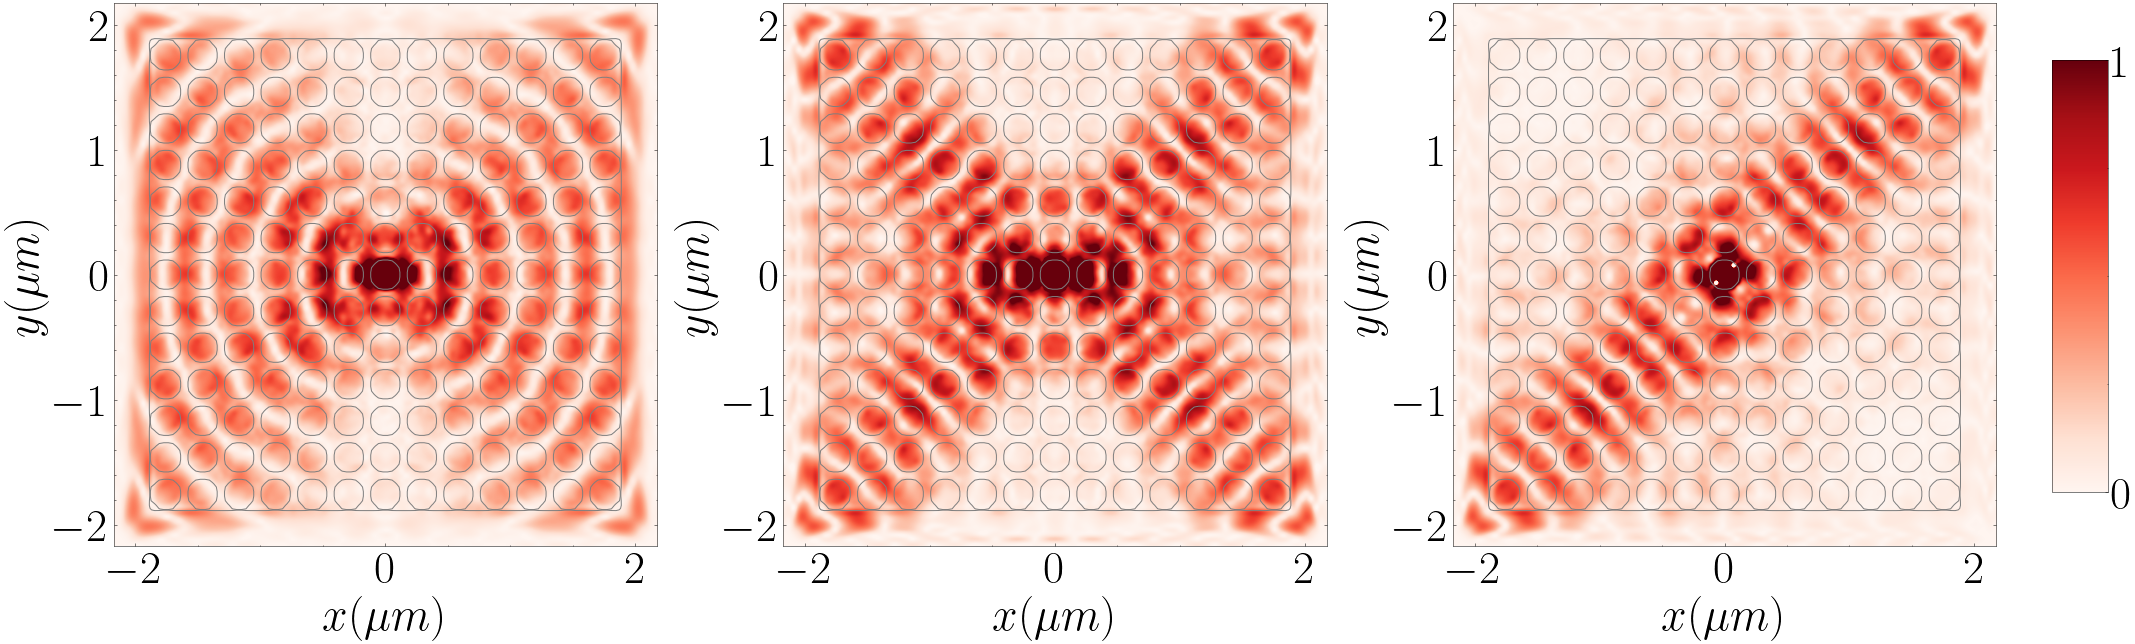

In [55]:
import matplotlib
plt.style.use("science")
matplotlib.rcParams.update({"font.size": 46})

extent = [-0.5*length*a*10**6,0.5*length*a*10**6, -0.5*length*a*10**6, 0.5*length*a*10**6]
fig,ax = plt.subplots(1,3,figsize=(34,10))
im = ax[0].imshow(intensity_0[:,:,-1].T, extent=extent, vmin=0.0,vmax=0.2, interpolation='spline36', cmap="Reds", alpha=1)
im = ax[1].imshow(intensity_1[:,:,-1].T, extent=extent, vmin=0.0,vmax=0.2, interpolation='spline36', cmap="Reds", alpha=1)
im = ax[2].imshow(intensity_2[:,:,-1].T, extent=extent, vmin=0.0,vmax=0.2, interpolation='spline36', cmap="Reds", alpha=1)

eps = sim.get_epsilon()

diel = ax[1].contour(eps[:,:, 20].T, extent=extent,levels=0, cmap='binary', alpha =1)
diel = ax[0].contour(eps[:,:, 20].T, extent=extent, levels=0, cmap='binary', alpha =1)
diel = ax[2].contour(eps[:,:, 20].T, extent=extent, levels=0, cmap='binary', alpha =1)

ticks = [0, 0.2]
cbax = fig.add_axes([0.92,0.2,0.0225,0.6])
cbar = fig.colorbar(im, cax=cbax, ticks=ticks, orientation='vertical',fraction=0.026)
cbar.ax.set_yticklabels([0, 1])  # horizontal colorbar

ax[0].set_xlabel("$x(\\mu m)$")
ax[0].set_ylabel("$y(\\mu m)$")
ax[1].set_xlabel("$x(\\mu m)$")
ax[1].set_ylabel("$y(\\mu m)$")
ax[2].set_xlabel("$x(\\mu m)$")
ax[2].set_ylabel("$y(\\mu m)$")
#plt.tight_layout()

In [56]:
fig.savefig("dipole_intensity_square_lattice.pdf")

In [44]:
#def updatefig(*args):
#    global k
#    k += 1
#    im.set_array(np.array(intensity[:,:,k].T))
#    return im,

In [45]:
#%matplotlib notebook


#import matplotlib.animation as animation

#fig,ax1 = plt.subplots()

#k =  0 
#im = ax1.imshow(intensity[:,:,k].T, vmin=-0.1,vmax=0.1, animated=True)

#eps = sim.get_epsilon()

#diel = ax1.imshow(eps[:,:, 20].T, interpolation='spline36', cmap='binary', alpha =0.1)

#ani = animation.FuncAnimation(fig, updatefig, frames=200, interval=60, blit=True, save_count=164)

#fig.colorbar(im, ax=ax1)

#plt.title('$I$ field in the X-Y plane')
#plt.show()

In [46]:
#k=0

#import os
#path = os.path.abspath(os.getcwd())
#print(path)

#save = True

#if save == True:
#    writervideo = animation.FFMpegWriter(fps=10) 
#    ani.save(path+'/results/intensity_atom_PCS_diagonal.mp4', writer=writervideo)